<a href="https://colab.research.google.com/github/pouriakouhzadeh/Crypto-forcast-by-LSTM/blob/master/final%20codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADAUSD.csv', date_parser = True)
# data.keys()
# data.columns=['Date', 'time', 'open', 'high', 'low','close','vlome']
data.dropna(subset = ["Close"], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
# Reverse rows using iloc() Function
data = data.iloc[::-1]
#add open-close to last vector of dataframe data
data['open-close'] = data["Open"]-data["Close"]
# data1 = pd.DataFrame(data1)
# data1.columns=['Open-Close']
# data=data.join(data1)
#add high-low to last vector of dataframe data
data['high-low'] = data["High"]-data["Low"]
# data2 = pd.DataFrame(data2)
# data2.columns=['High-Low']
# data=data.join(data2)

data

<ipython-input-2-861afc77d31f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['open-close'] = data["Open"]-data["Close"]
<ipython-input-2-861afc77d31f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['high-low'] = data["High"]-data["Low"]


,Unix,Date,Symbol,Open,High,Low,Close,Volume,Volume Base Asset,tradecount,open-close,high-low
22723,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415,0.00057,0.00199
22722,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395,-0.00172,0.00172
22721,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575,-0.00021,0.00120
22720,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401,0.00051,0.00149
22719,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450,0.00115,0.00276
...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38270,0.38520,0.38240,0.38390,31728,8.269269e+05,867,-0.00120,0.00280
3,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38380,0.38520,0.38120,0.38200,48105,1.255351e+06,1180,0.00180,0.00400
2,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38300,0.38070,0.38190,58956,1.543282e+06,1193,0.00000,0.00230
1,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38320,0.38170,0.38310,27354,7.151011e+05,696,-0.00120,0.00150


In [3]:
data_training = data[data['Date']< '2023-01-01'].copy()
data_test = data[data['Date']>= '2023-01-01'].copy()

training_data = data_training.drop(['Unix', 'Date','Symbol'], axis = 1)
training_data

 


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount,open-close,high-low
22723,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415,0.00057,0.00199
22722,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395,-0.00172,0.00172
22721,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575,-0.00021,0.00120
22720,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401,0.00051,0.00149
22719,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450,0.00115,0.00276
...,...,...,...,...,...,...,...,...,...
2212,0.24714,0.24878,0.24714,0.24840,70408,2.841428e+06,1062,-0.00126,0.00164
2211,0.24835,0.24925,0.24835,0.24895,19130,7.692239e+05,364,-0.00060,0.00090
2210,0.24890,0.24931,0.24770,0.24780,33712,1.356489e+06,613,0.00110,0.00161
2209,0.24785,0.24800,0.24540,0.24608,46596,1.888972e+06,929,0.00177,0.00260


In [4]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01205937, 0.01210502, 0.01220523, ..., 0.00245083, 0.37513134,
        0.00289827],
       [0.01185733, 0.01217768, 0.01236962, ..., 0.00232736, 0.37125038,
        0.00245864],
       [0.01245351, 0.01255421, 0.01292654, ..., 0.00343857, 0.37380944,
        0.00161196],
       ...,
       [0.0571404 , 0.05690184, 0.0578356 , ..., 0.00367316, 0.37602956,
        0.00227954],
       [0.05679263, 0.05646917, 0.05706397, ..., 0.00562394, 0.37716503,
        0.00389149],
       [0.05619314, 0.05600016, 0.05693313, ..., 0.01188992, 0.37496187,
        0.00221441]])

In [6]:
X_train = []
Y_train = []
training_data.shape[0]
for i in range(51, training_data.shape[0]):
    X_train.append(training_data[i-51:i])
    Y_train.append(training_data[i,8])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(20465, 51, 9)

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 9)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 51, 50)            12000     
                                                                 
 dropout (Dropout)           (None, 51, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 51, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 51, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 51, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 51, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [9]:
model.compile(optimizer ='adam' , loss = 'mean_squared_error') # optimizer ='adam'
history= model.fit(X_train, Y_train, epochs = 5, batch_size =1, validation_split=0.1)

Epoch 1/5
18418/18418 [==============================] - 1342s 73ms/step - loss: 0.0010 - val_loss: 5.7563e-04
Epoch 2/5
18418/18418 [==============================] - 1204s 65ms/step - loss: 19.4233 - val_loss: 2.5249e-04
Epoch 3/5
18418/18418 [==============================] - 1210s 66ms/step - loss: 8.4601e-04 - val_loss: 2.3885e-04
Epoch 4/5
18418/18418 [==============================] - 1193s 65ms/step - loss: 14.9726 - val_loss: 5.9351e-04
Epoch 5/5
18418/18418 [==============================] - 1198s 65ms/step - loss: 8.1512e-04 - val_loss: 3.6468e-04


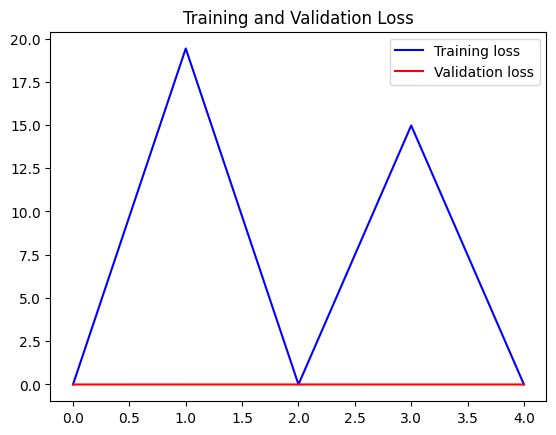

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
# part_60_days = data_training.tail(60)
# df= part_60_days.append(data_test, ignore_index = True)
# df = df.drop(['Unix', 'Date','Symbol'], axis = 1)
# df.head(20)

<ipython-input-8-d32d46e5ef9f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount,Open-Close,High-Low
0,0.24556,0.24607,0.24502,0.24521,45132,1.838876e+06,920,0.00035,0.00105
1,0.24521,0.24591,0.24429,0.24555,99709,4.065839e+06,1957,-0.00034,0.00162
2,0.24554,0.24629,0.24497,0.24528,90171,3.672931e+06,1790,0.00026,0.00132
3,0.24531,0.24643,0.24531,0.24574,91292,3.711158e+06,1707,-0.00043,0.00112
4,0.24578,0.24616,0.24519,0.24557,56522,2.300470e+06,1015,0.00021,0.00097
5,0.24555,0.24588,0.24428,0.24459,67509,2.756440e+06,1323,0.00096,0.00160
6,0.24458,0.24497,0.24413,0.24497,51993,2.125838e+06,1034,-0.00039,0.00084
7,0.24501,0.24544,0.24241,0.24333,151985,6.238094e+06,3003,0.00168,0.00303
8,0.24330,0.24369,0.23905,0.24212,340867,1.411658e+07,7695,0.00118,0.00464
9,0.24203,0.24207,0.24073,0.24093,107530,4.455321e+06,2215,0.00110,0.00134


In [11]:
inputs = scaler.transform(data_test)

ValueError: ignored

In [ ]:
X_test = []
Y_test = []
for i in range (51, inputs.shape[0]):
    X_test.append(inputs[i-51:i]) 
    Y_test.append(inputs[i, 8])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_pred = model.predict(X_test) 
print(Y_test)
real_Y_pred = scaler.inverse_transform(Y_pred)

70/70 [==============================] - 6s 69ms/step
[0.0054546  0.00210043 0.00265403 ... 0.00340302 0.00210043 0.00226325]


In [ ]:
# scale = 1/5.18164146e-05
# Y_test = Y_test*scale 
# Y_pred = Y_pred*scale
df = pd.DataFrame()
df['Y_test'] = Y_test
df['Y_pred'] = real_Y_pred


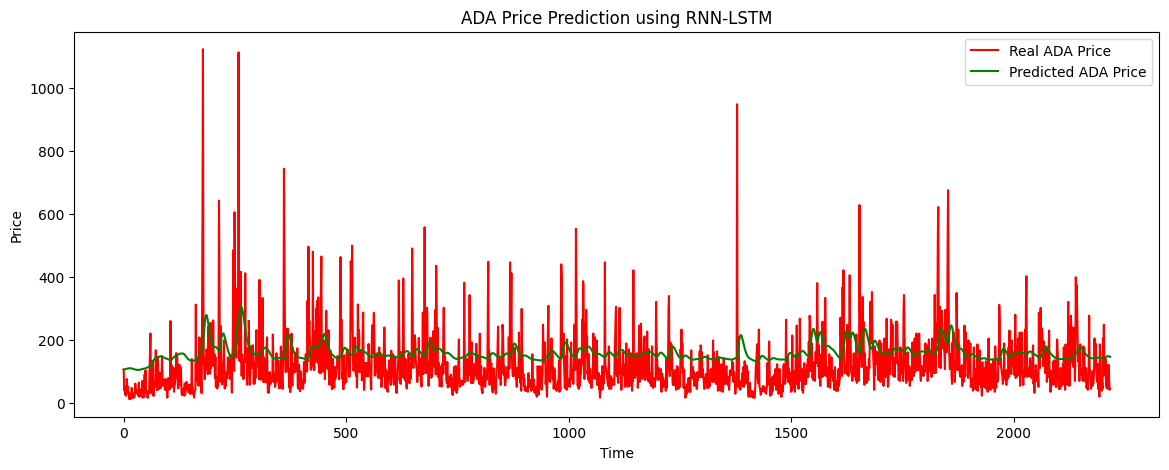

In [ ]:
plt.figure(figsize=(14,5))
# plt.plot(Y_test, color = 'red', label = 'Real ADA Price')
# plt.plot(real_Y_pred, color = 'green', label = 'Predicted ADA Price')
plt.plot(df['Y_test'], color = 'red')
plt.plot(df['real_Y_pred'], color = 'green')
plt.title('ADA Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [ ]:
Y_test

array([105.2678906 ,  40.53599369,  51.21989901, ...,  65.67459443,
        40.53599369,  43.67831879])

In [ ]:
win =0
for i in range (len(Y_test)):
  if (Y_pred[i][1] < 0) :
    # if(Y_pred[i][1] > 0) :
      win+=1

print(win)      

IndexError: ignored